In [10]:
%pip install pandas
%pip install numpy
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
#import Libraries
import pandas as pd
import folium
import matplotlib.pyplot as plt
from math import radians, cos, sin, sqrt, atan2


In [12]:
# Function to calculate distance between two GPS points using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat / 2)*2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)*2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance


In [13]:
# Step 2: Read Data
gps_data = pd.read_csv("gps_Data_2.csv")

In [14]:
# Step 3: Draw Walking Path
map_osm = folium.Map(location=[gps_data["Latitude"].mean(), gps_data["Longitude"].mean()], zoom_start=15)
for index, row in gps_data.iterrows():
    folium.Marker(location=[row["Latitude"], row["Longitude"]]).add_to(map_osm)
map_osm.save("walking_path_map.html")

In [15]:
# Step 4: Calculate Velocity using Haversine formula
gps_data["Velocity_Haversine"] = [haversine(gps_data.loc[i-1, "Latitude"], gps_data.loc[i-1, "Longitude"], 
                                             row["Latitude"], row["Longitude"]) / (row["Time"] - gps_data.loc[i-1, "Time"])
                                   if i > 0 else 0
                                   for i, row in gps_data.iterrows()]
                                   

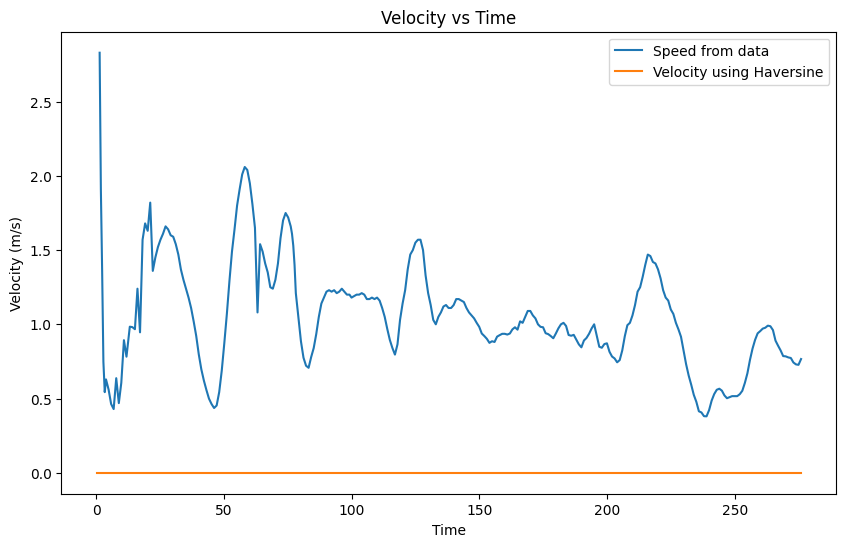

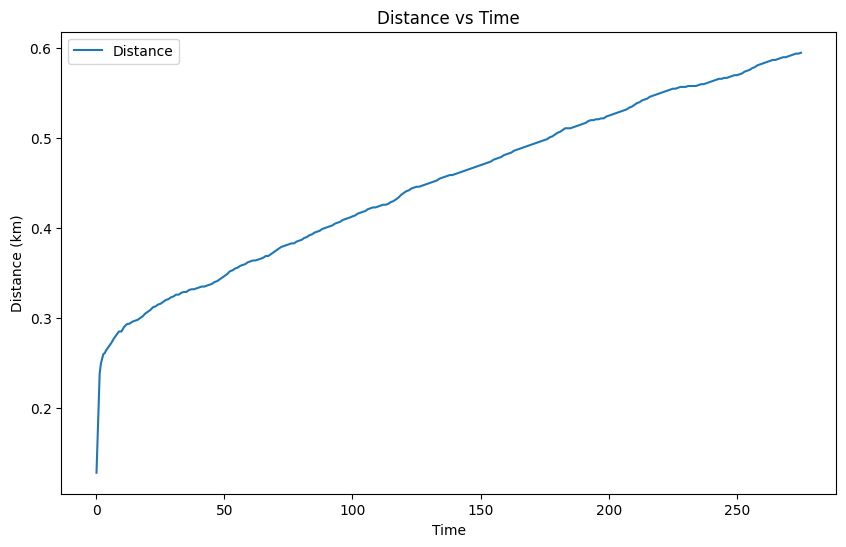

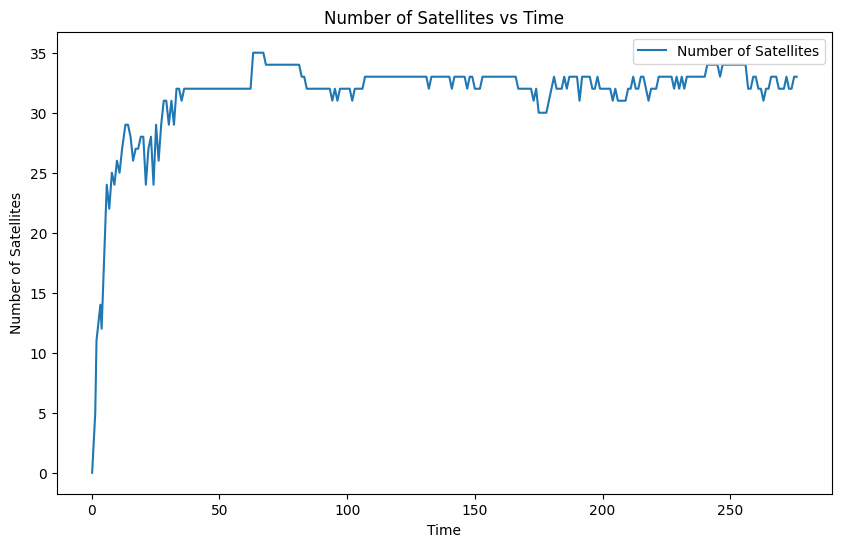

In [16]:
# Step 5: Plot Line Plots
plt.figure(figsize=(10, 6))
plt.plot(gps_data["Time"], gps_data["Speed (m/s)"], label="Speed from data")
plt.plot(gps_data["Time"], gps_data["Velocity_Haversine"], label="Velocity using Haversine")
plt.xlabel("Time")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity vs Time")
plt.legend()
plt.savefig("velocity_plot.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(gps_data["Time"], gps_data["Distance (km)"], label="Distance")
plt.xlabel("Time")
plt.ylabel("Distance (km)")
plt.title("Distance vs Time")
plt.legend()
plt.savefig("distance_plot.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(gps_data["Time"], gps_data["Satellites"], label="Number of Satellites")
plt.xlabel("Time")
plt.ylabel("Number of Satellites")
plt.title("Number of Satellites vs Time")
plt.legend()
plt.savefig("satellites_plot.png")
plt.show()